In [ ]:
import numpy as np
from sklearn import datasets as dt
from sklearn import metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn import tree as T
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.utils import shuffle

X,Y = dt.load_iris(return_X_y=True)

X,Y = shuffle(X,Y, random_state=0)

X_train=X[range(0,135),:]
Y_train=Y[range(0,135)]

X_test=X[range(135,150),:]
Y_test=Y[range(135,150)]

# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

In [ ]:
clf=DTC(criterion='entropy')
# clf=DTC()

In [ ]:
clf.fit(X_train,Y_train)
prediction=clf.predict(X_test)
print(prediction)

print("\nAccuracy with normalize = ",mt.accuracy_score(Y_test,prediction,normalize=True))
print(mt.classification_report(Y_test,prediction))
print(mt.confusion_matrix(Y_test,prediction))

[1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]

Accuracy with normalize =  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.83      0.91         6
           2       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.95      0.93      0.93        15

[[5 0 0]
 [0 5 1]
 [0 0 4]]


[Text(148.8, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 135\nvalue = [45, 44, 46]'),
 Text(111.60000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(186.0, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 90\nvalue = [0, 44, 46]'),
 Text(148.8, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.475\nsamples = 49\nvalue = [0, 44, 5]'),
 Text(74.4, 90.6, 'X[3] <= 1.65\nentropy = 0.159\nsamples = 43\nvalue = [0, 42, 1]'),
 Text(37.2, 54.359999999999985, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(111.60000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(186.0, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(260.40000000000003, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(223.20000000000002, 18.119999999999976, 'entr

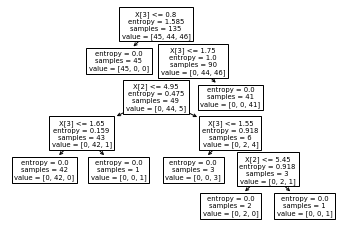

In [ ]:
T.plot_tree(clf)

In [ ]:
params = {
        'max_leaf_nodes': list(range(2, 100)),
        'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(DTC(random_state=42), params, verbose=1, cv=3).fit(X_train,Y_train)

print(grid.best_params_)
print()
print(grid.best_estimator_)
print(grid.predict(X_test))
print()
print(mt.accuracy_score(Y_test,grid.predict(X_test),normalize=True))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_leaf_nodes': 4, 'min_samples_split': 2}

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
[1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]

0.9333333333333333


[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    1.0s finished
